# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
# Your code here
import pandas as pd
import numpy as np

In [3]:
boston_df = pd.read_csv('../data/boston_data.csv')
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
len(boston_df)

404

In [5]:
boston_df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

crim         3.970775
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.178000
rm           0.726500
age         48.350000
dis          3.134250
rad         20.000000
tax        385.000000
ptratio      2.825000
black       21.297500
lstat        9.775000
medv         7.900000
dtype: float64


In [7]:
boston_df = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR)))]

In [8]:
boston_df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
5,0.08370,NaN,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39,34.9
6,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
7,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90,21.6
8,NaN,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,NaN,19.69,14.1
9,1.41385,0.0,19.58,NaN,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,NaN,15.12,17.0


In [9]:
boston_df.isna().sum()

crim       42
zn         49
indus       0
chas       28
nox         0
rm         21
age         0
dis         5
rad         0
tax         0
ptratio    12
black      61
lstat       2
medv       27
dtype: int64

In [10]:
boston_df = boston_df.fillna(boston_df.mean())

In [11]:
boston_df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.158760,0.000000,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.940000,9.88,21.7
1,0.103280,25.000000,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.900000,9.22,19.6
2,0.349400,0.000000,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.240000,9.97,20.3
3,2.733970,0.000000,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.850000,21.45,15.4
4,0.043370,21.000000,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.970000,9.43,20.5
5,0.083700,3.260563,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.900000,5.39,34.9
6,0.190730,22.000000,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.740000,6.56,26.2
7,0.269380,0.000000,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.390000,7.90,21.6
8,1.529975,0.000000,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,388.311458,19.69,14.1
9,1.413850,0.000000,19.58,0.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,388.311458,15.12,17.0


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

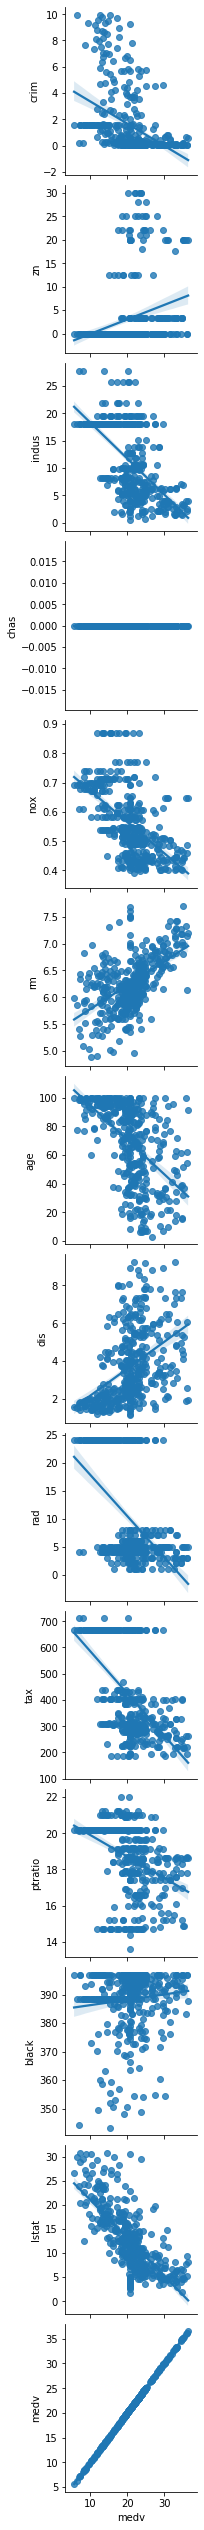

In [13]:
# Your plots here
sns.pairplot(boston_df,y_vars=boston_df.columns, x_vars='medv',kind='reg')
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [14]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

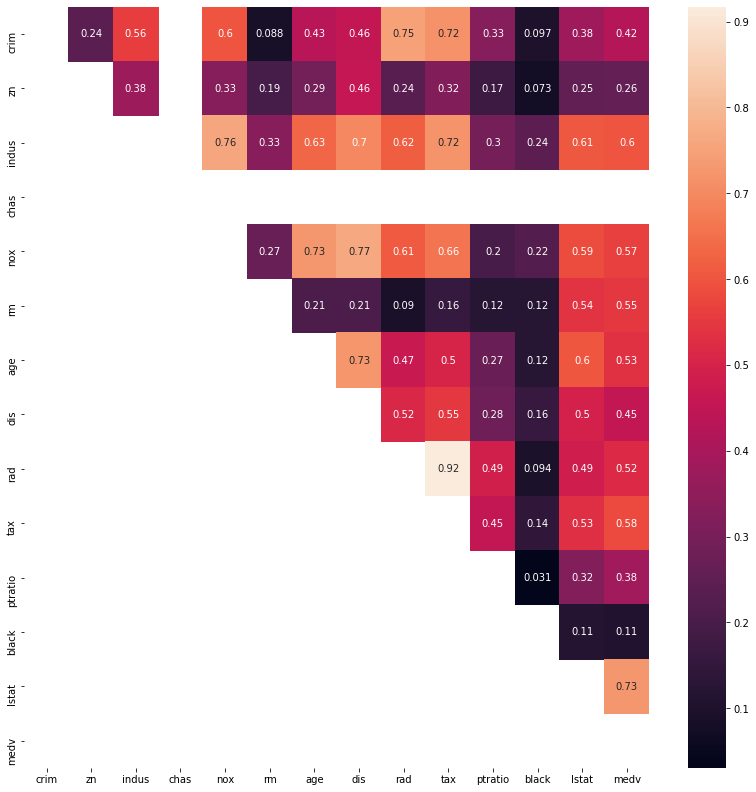

In [16]:
# Your response here
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(14,14))
corrMatrix = boston_df.corr().abs()
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

sns.heatmap(upper, annot=True);

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [17]:
# Your code here
boston_df['medv'].describe()

count    404.000000
mean      20.841379
std        6.229748
min        5.600000
25%       17.200000
50%       20.841379
75%       23.900000
max       36.500000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [20]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    performance = r2_score(y_true,y_predict)
    
    return performance

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [21]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
X = boston_df.drop('medv', axis=1)
y = boston_df['medv']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

### Scores Train Set

In [25]:
parameter = [2, 4, 6, 8, 10]
tree_scores_train = []

for par in parameter:
    RFR = RandomForestRegressor(max_depth = par)
    RFR.fit(X_train, y_train)
    predictions_RFR = RFR.predict(X_train)
    performance = performance_metric(y_train, predictions_RFR)
    print('For', par, ':', performance)
    tree_scores_train.append(performance)

For 2 : 0.6984702760345995
For 4 : 0.8467636887280627
For 6 : 0.9306041252324072
For 8 : 0.9580759797111459
For 10 : 0.9612814913043468


### Scores with Test Set

In [26]:
parameter = [2, 4, 6, 8, 10]
tree_scores_test = []

for par in parameter:
    RFR = RandomForestRegressor(max_depth = par)
    RFR.fit(X_train, y_train)
    predictions_RFR = RFR.predict(X_test)
    performance = performance_metric(y_test, predictions_RFR)
    print('For', par, ':', performance)
    tree_scores_test.append(performance)

For 2 : 0.6188556567508887
For 4 : 0.6645227829212885
For 6 : 0.6697996634974611
For 8 : 0.6801371597860748
For 10 : 0.6833350333898291


Now, plot the score for each tree on the training set and on the testing set.

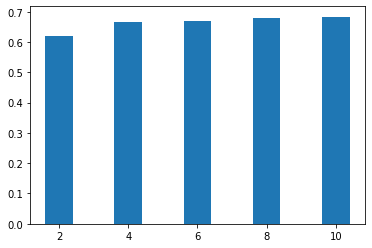

In [28]:
# Produce a plot with the score for the testing and training for the different max depths
plt.bar(parameter, tree_scores_test)
plt.show()

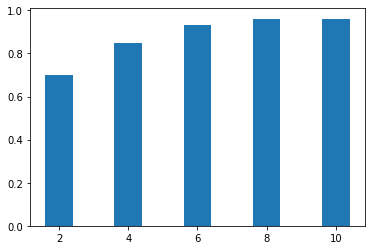

In [29]:
plt.bar(parameter, tree_scores_train)
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [30]:
# Your response here
# The bigger the depth the higher the score

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here